## **Self Organizing Feature Map**

**1. Implement a self-organizing feature map on IRIS data for clustering purpose and find the Silhouette Coefficient of the clusters**

In [ ]:
import pandas as pd
import numpy as np
import random
import math


irisDataSet=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None);
irisDataSet.columns=['Sepal-length(cm)','Sepal-width(cm)','Petal-length(cm)','Petal-width(cm)','Class']
irisDataSet

,Sepal-length(cm),Sepal-width(cm),Petal-length(cm),Petal-width(cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
irisData=irisDataSet.to_numpy()
irisData=irisData[:,:-1]

In [ ]:
class SOFM(object):



  def __init__(self,dataSet,nInputs,width,height,lr=0.01,iterNos=100):


    self.dataSet=dataSet
    self.iterNos=iterNos
    self.lr=lr

    self.nInputs=nInputs

    self.width=width
    self.height=height

    self.surrRadius=(self.height+self.width)/2
    self.tc=self.iterNos/np.log(self.surrRadius)
    min=self.dataSet.min()
    max=self.dataSet.max()
    self.network=[]
    for i in range(self.width):
      self.network.append([{'weights': np.random.uniform(low=min,high=max,size=self.nInputs)} for i in range(self.height)])


  def fit(self):

    
    for i in range(self.iterNos):

      leftIndxs=[(i)for i in range(len(self.dataSet))]

      self.lr*=np.exp(-i/self.iterNos)
      self.surrRadius*=np.exp(-i/self.tc)

      for j in range(len(self.dataSet)):

        indx=random.choice(leftIndxs)
        xi=self.dataSet[indx]
        del leftIndxs[leftIndxs.index(indx)]

        minIndxs=self.winningNeuron(xi)

        self.updateNetwork(minIndxs,xi)


  def winningNeuron(self,input):
    minDist=1e9
    minIndxs=None
    for i in range(len(self.network)):
      for j in range(len(self.network[i])):
        dist=self.euclideanDist(self.network[i][j]['weights'],input)

        if dist < minDist:
          minDist=dist
          minIndxs=(i,j)

    return minIndxs

    
  def updateNetwork(self,minIndxs,input):

    winNeuron=self.network[minIndxs[0]][minIndxs[1]]
    for i in range(len(self.network)):
      for j in range(len(self.network[i])):

        dist=self.euclideanDist(self.network[i][j]['weights'],winNeuron['weights'])

        tN=np.exp(-( (dist)**2)/( 2*((self.surrRadius)**2) ))
        dW=self.lr*tN*(input-self.network[i][j]['weights'])
        w=self.network[i][j]['weights']+dW
        self.network[i][j]['weights']=w


  def euclideanDist(self,node1,node2):
	  return np.sqrt(sum((node1-node2) ** 2))


In [ ]:
sofm=SOFM(irisData,4,10,10,lr=0.1)


_points=[]
for i in range(len(sofm.network)):
  for j in range(len(sofm.network[i])):
    _points.append(sofm.network[i][j]['weights'])


sofm.fit()

In [ ]:

points=[]
for i in range(len(sofm.network)):
  for j in range(len(sofm.network[i])):
    points.append(sofm.network[i][j]['weights'])


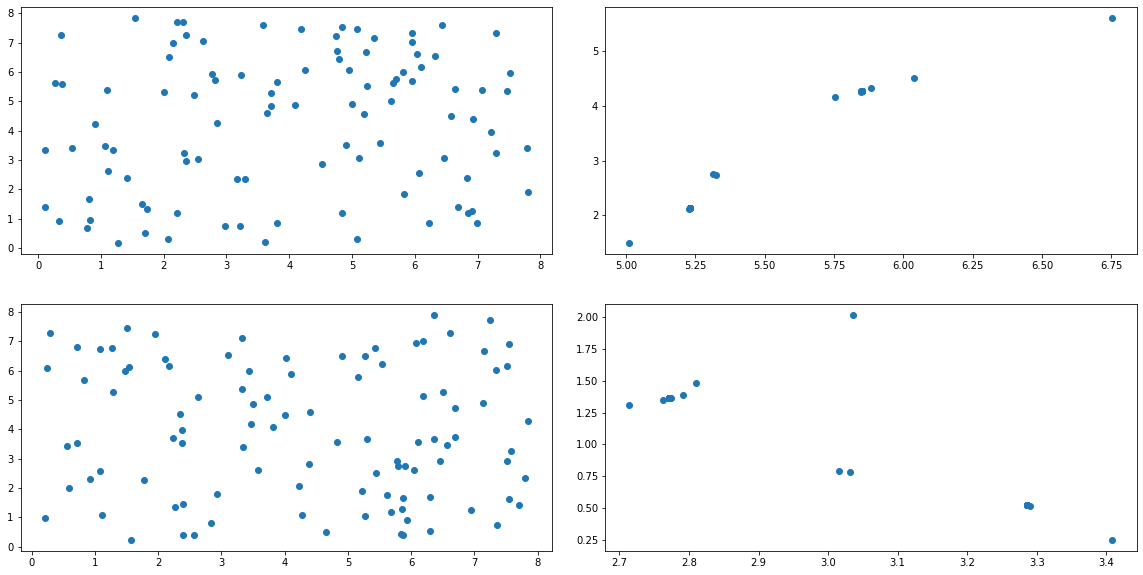

In [ ]:
import matplotlib.pyplot as plt


fig,ax=plt.subplots(2,2,figsize=(20, 10))

_points=np.array(_points)
ax[0,0].scatter(_points[:,0:1],_points[:,2:3])
ax[1,0].scatter(_points[:,1:2],_points[:,3:4])


points=np.array(points)
ax[0,1].scatter(points[:,0:1],points[:,2:3])
ax[1,1].scatter(points[:,1:2],points[:,3:4])

plt.subplots_adjust(wspace=0.1)
fig.show()



In [ ]:
class Cluster(object):
  def __init__(self,nodeIds,centroidNode):
    self.nodeIds=nodeIds
    self.centroidNode=centroidNode


class KMeans(object):

  def __init__(self,dataSet,k):
    self.k=k
    self.dataSet=dataSet
    pnt=np.random.randint(0,len(self.dataSet),size=self.k)
    self.clusters=[(Cluster([],self.dataSet[i]))for i in pnt]
    self.meanSqDevs=[]


  def Clustering(self):
    for cluster in self.clusters:
      cluster.nodeIds=[]
    for i,node in enumerate(self.dataSet):
      minIndx,minD=self.MinDistanceCluster(node)
      self.clusters[minIndx].nodeIds.append(i)
      self.clusters[minIndx].centroidNode=self.UpdateCentroid(self.clusters[minIndx],node)
  
  def fit(self):
    for i in range(20):

      self.Clustering()
      self.meanSqDevs.append(self.AvgSqDev())




  def AvgSqDev(self):
    nodes=self.dataSet
    stdDev=[]
    for cluster in self.clusters: 
      s=0.0
      for nodeId in cluster.nodeIds:
        s+=sum((nodes[nodeId]-cluster.centroidNode)**2)
      # s/=len(cluster.nodeIds)
      # s=(s)**0.5
      stdDev.append(s)
    return np.mean(stdDev)

  

  def UpdateCentroid(self,cluster,node):
    nodes=len(cluster.nodeIds)*np.array(cluster.centroidNode)+np.array(node) 
    centroid = nodes/(len(cluster.nodeIds)+1)
    return centroid

  def MinDistanceCluster(self,node):
    minD=1e9
    minIndx=1e9
    for i,cluster in enumerate(self.clusters):
      d=math.sqrt(sum((cluster.centroidNode-node)**2))
      if d <= minD:
        minD=d
        minIndx=i
    return int(minIndx),minD

In [ ]:
K=[1,2,3,4,5,6,7,8,9,10]


sqDev=[]
for k in K:
  _km=KMeans(points,k)
  _km.fit()
  sqDev.append(np.mean(_km.meanSqDevs))
sqDev

[137.00916729551142,
 2.363441092498952,
 0.5870286585122567,
 0.4144813712305474,
 0.32796934604659206,
 0.02612762857808123,
 0.09110716775846775,
 0.019208771528117147,
 0.1807490576810679,
 0.162674151912961]

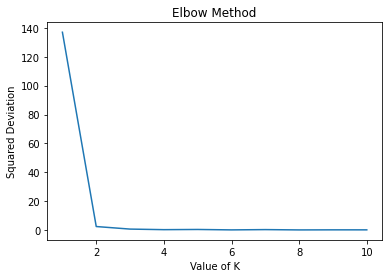

In [ ]:
plt.xlabel('Value of K')
plt.ylabel('Squared Deviation')
plt.title('Elbow Method')
plt.plot(K,sqDev)
plt.show()

In [ ]:
km=KMeans(points,3)
km.fit()


def MinDistanceCluster(node,clusters):
  minD=1e9
  minIndx=1e9
  for i,cluster in enumerate(clusters):
    d=math.sqrt(sum((cluster.centroidNode-node)**2))
    if d < minD:
      minD=d
      minIndx=i
  return int(minIndx)

clusters=[]


for c in km.clusters:
  clusters.append(Cluster([],c.centroidNode))

for i,xi in enumerate(irisData):
  minD=MinDistanceCluster(xi,clusters)
  clusters[minD].nodeIds.append(i)


for cluster in clusters:
  print(cluster.nodeIds)

[51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 106, 113, 119, 121, 123, 126, 127, 138, 142, 149]
[50, 52, 76, 77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 146, 147, 148]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 98]


In [ ]:
def euclideanDist(node1,node2):
	return np.sqrt(sum((node1-node2) ** 2))

def SilhouetteScore(clusters):
  
  intraDist=0.0
  for cluster in clusters:
    
    for j in range(len(cluster.nodeIds)):
      for k in range(j+1,len(cluster.nodeIds)):

        intraDist+=euclideanDist(irisData[cluster.nodeIds[j]],irisData[cluster.nodeIds[k]])

    if len(cluster.nodeIds)>1:
      intraDist/=(len(cluster.nodeIds)*(len(cluster.nodeIds)-1)/2)
  
  intraDist/=len(clusters)

  interDist=0.0
  for i in range(len(clusters)):
    for j in range(i+1,len(clusters)):
      interDist+=euclideanDist(clusters[i].centroidNode,clusters[j].centroidNode)
  
  interDist/=len(clusters)

  ss=(interDist-intraDist)/max(interDist,intraDist)

  return ss

In [ ]:
SilhouetteScore(clusters)

0.908707941087516

**2. Repeat the same experiment (as in Question 1) using the inbuilt function.**

In [ ]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=1addc86af669c1524e6ef20d15c4091e073b140a59ef7d074ea88317441e5552
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom


In [ ]:
import math
from minisom import MiniSom
from sklearn import datasets

iris = datasets.load_iris()



som = MiniSom(10,10, 4, sigma=0.3, learning_rate=0.5)
som.random_weights_init(iris.data)
som.train_random(iris.data,200)


**3. Compare the accuracy using Silhouette Coefficient of Question: 1&2 with the k-means
algorithm from the previous assignment.**

In [ ]:
kmeans=KMeans(irisData,3)

kmeans.fit()

SilhouetteScore(kmeans.clusters)

0.9153759821114152